<a href="https://colab.research.google.com/github/bhrionn/CORVINUS-AI/blob/main/CaliforniaHousingDataNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this Lab we are going to load the SciKitLearn California housing dataset, analyse and review the data.
For part two we will use a number of techniques  i.e ( Multiple Linear Regression, SVR, K Nearest Neighbor Regression, Random Forest Regression and XGBoost) to do the prediction, finally we will apply the Adjusted R^2 to measure the models.

In [144]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



## Load and understand the dataset
The dataset records houses sold in dataset fetch_california_housing.

In [145]:
california_housing = fetch_california_housing(as_frame=True)
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

Lets look at the entire dataset

In [146]:
# Lets look at the entire dataset

california_housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


As written in the description, the dataset contains aggregated data regarding each district in California. Let’s have a close look at the features that can be used by a predictive model.

In [33]:
california_housing.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In this dataset, we have information regarding the demography (income, population, house occupancy) in the districts, the location of the districts (latitude, longitude), and general information regarding the house in the districts (number of rooms, number of bedrooms, age of the house). Since these statistics are at the granularity of the district, they corresponds to averages or medians.

We can now check more into details the data types and if the dataset contains any missing value.

Look to the target to be predicted.

In [147]:
california_housing.target.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

We can now check more into details the data types and if the dataset contains any missing value.

In [148]:
# check more into details the data types and if the dataset contains any missing value.
california_housing.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


We can see that:



*   the dataset contains 20,640 samples and 8 features;
*   all features are numerical features encoded as floating number;
*   there is no missing values.

Let’s have a quick look at the distribution of these features by plotting their histograms.

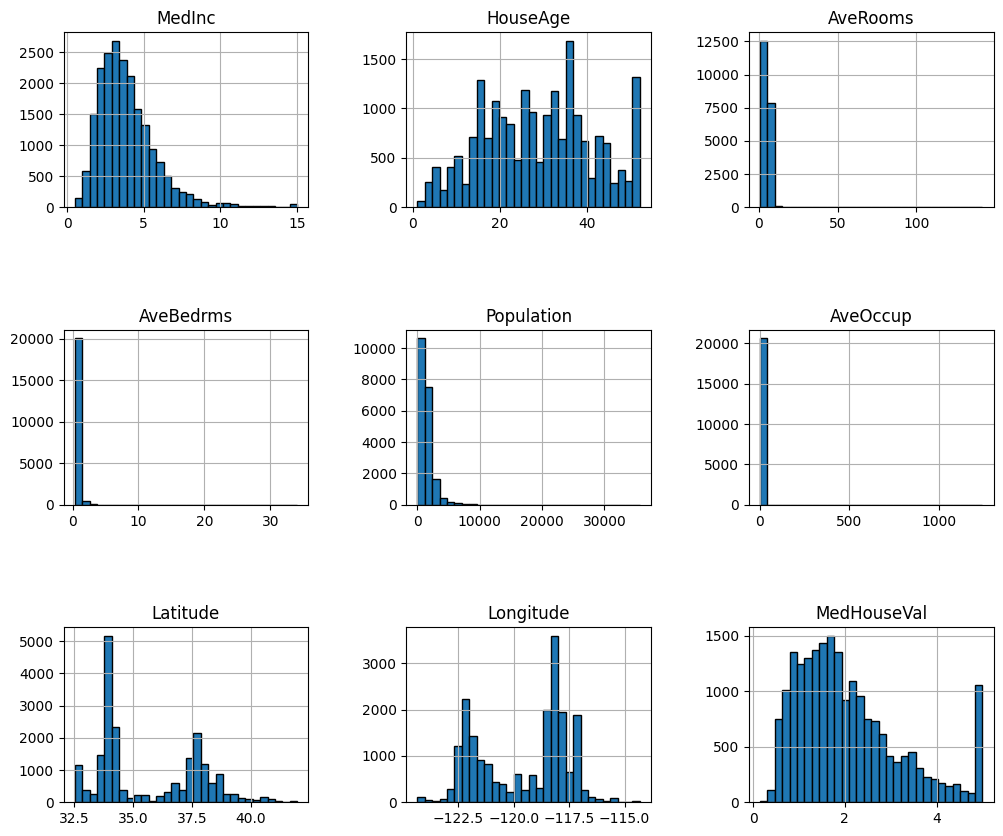

In [36]:
import matplotlib.pyplot as plt

california_housing.frame.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

We can first focus on features for which their distributions would be more or less expected.

The median income is a distribution with a long tail. It means that the salary of people is more or less normally distributed but there is some people getting a high salary.

Regarding the average house age, the distribution is more or less uniform.

The target distribution has a long tail as well. In addition, we have a threshold-effect for high-valued houses: all houses with a price above 5 are given the value 5.

Focusing on the average rooms, average bedrooms, average occupation, and population, the range of the data is large with unnoticeable bin for the largest values. It means that there are very high and few values (maybe they could be considered as outliers?). We can see this specificity looking at the statistics for these features:

In [37]:
features_of_interest = ["AveRooms", "AveBedrms", "AveOccup", "Population"]
california_housing.frame[features_of_interest].describe()

,AveRooms,AveBedrms,AveOccup,Population
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,5.429000,1.096675,3.070655,1425.476744
std,2.474173,0.473911,10.386050,1132.462122
min,0.846154,0.333333,0.692308,3.000000
25%,4.440716,1.006079,2.429741,787.000000
50%,5.229129,1.048780,2.818116,1166.000000
75%,6.052381,1.099526,3.282261,1725.000000
max,141.909091,34.066667,1243.333333,35682.000000


For each of these features, comparing the max and 75% values, we can see a huge difference. It confirms the intuitions that there are a couple of extreme values.

Up to now, we discarded the longitude and latitude that carry geographical information. In short, the combination of this feature could help us to decide if there are locations associated with high-valued houses. Indeed, we could make a scatter plot where the x- and y-axis would be the latitude and longitude and the circle size and color would be linked with the house value in the district.

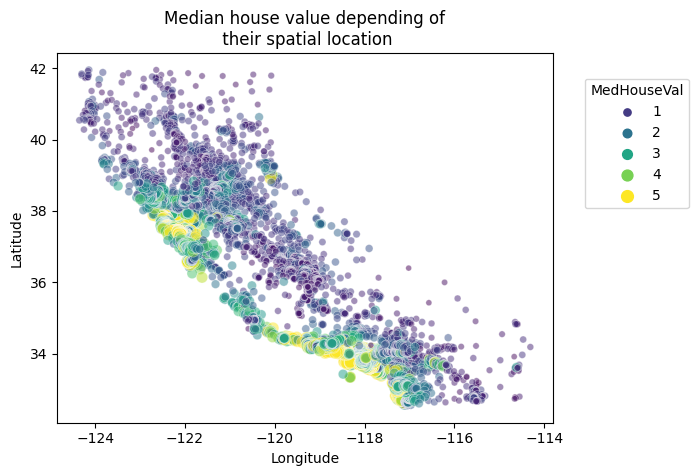

In [38]:
import seaborn as sns

sns.scatterplot(
    data=california_housing.frame,
    x="Longitude",
    y="Latitude",
    size="MedHouseVal",
    hue="MedHouseVal",
    palette="viridis",
    alpha=0.5,
)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95), loc="upper left")
_ = plt.title("Median house value depending of\n their spatial location")

If you are not familiar with the state of California, it is interesting to notice that all datapoints show a graphical representation of this state. We note that the high-valued houses will be located on the coast, where the big cities from California are located: San Diego, Los Angeles, San Jose, or San Francisco.

We can do a random subsampling to have less data points to plot but that could still allow us to see these specificities.

In [39]:
import numpy as np

rng = np.random.RandomState(0)
indices = rng.choice(
    np.arange(california_housing.frame.shape[0]), size=500, replace=False
)

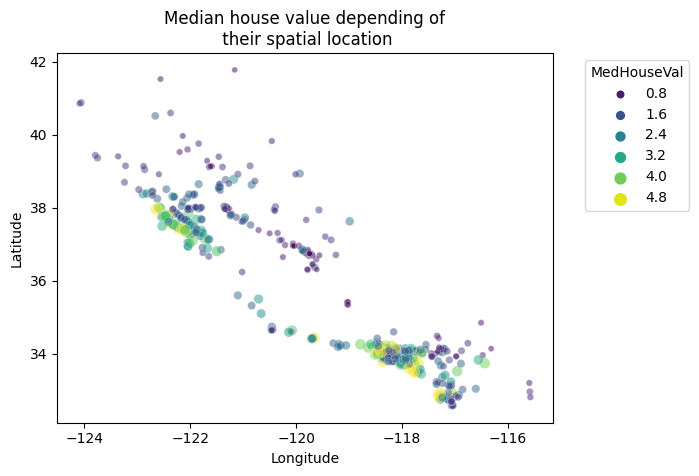

In [40]:
sns.scatterplot(
    data=california_housing.frame.iloc[indices],
    x="Longitude",
    y="Latitude",
    size="MedHouseVal",
    hue="MedHouseVal",
    palette="viridis",
    alpha=0.5,
)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 1), loc="upper left")
_ = plt.title("Median house value depending of\n their spatial location")

We can make a final analysis by making a pair plot of all features and the target but dropping the longitude and latitude. We will quantize the target such that we can create proper histogram.

In [41]:
import pandas as pd

# Drop the unwanted columns
columns_drop = ["Longitude", "Latitude"]
subset = california_housing.frame.iloc[indices].drop(columns=columns_drop)
# Quantize the target and keep the midpoint for each interval
subset["MedHouseVal"] = pd.qcut(subset["MedHouseVal"], 6, retbins=False)
subset["MedHouseVal"] = subset["MedHouseVal"].apply(lambda x: x.mid)

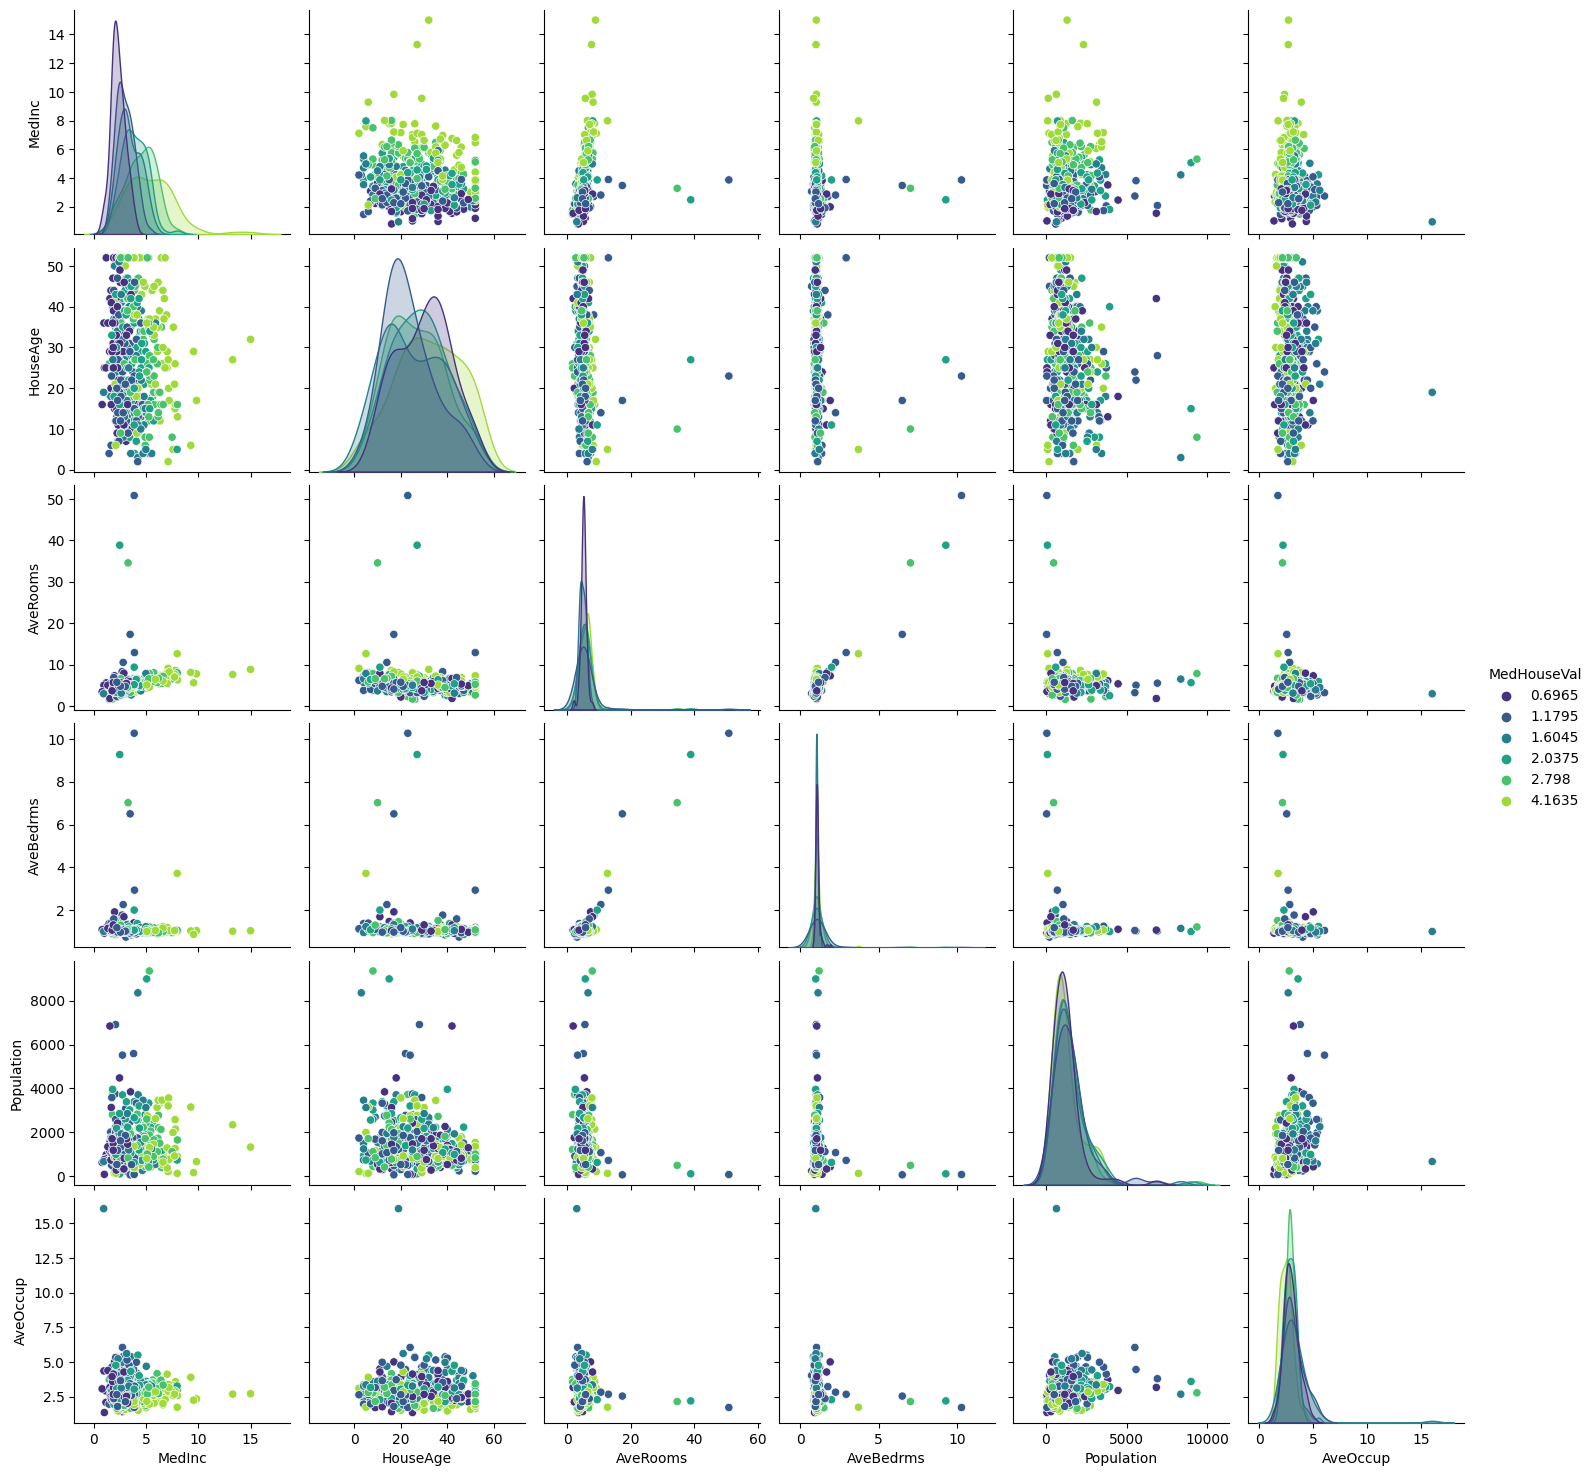

In [42]:
_ = sns.pairplot(data=subset, hue="MedHouseVal", palette="viridis")

While it is always complicated to interpret a pairplot since there is a lot of data, here we can get a couple of intuitions. We can confirm that some features have extreme values (outliers?). We can as well see that the median income is helpful to distinguish high-valued from low-valued houses.

Thus, creating a predictive model, we could expect the longitude, latitude, and the median income to be useful features to help at predicting the median house values.

If you are curious, we created a linear predictive model below and show the values of the coefficients obtained via cross-validation.

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

alphas = np.logspace(-3, 1, num=30)
model = make_pipeline(StandardScaler(), RidgeCV(alphas=alphas))
cv_results = cross_validate(
    model,
    california_housing.data,
    california_housing.target,
    return_estimator=True,
    n_jobs=2,
)

In [44]:
score = cv_results["test_score"]
print(f"R2 score: {score.mean():.3f} ± {score.std():.3f}")

R2 score: 0.553 ± 0.062


In [45]:
import pandas as pd

coefs = pd.DataFrame(
    [est[-1].coef_ for est in cv_results["estimator"]],
    columns=california_housing.feature_names,
)

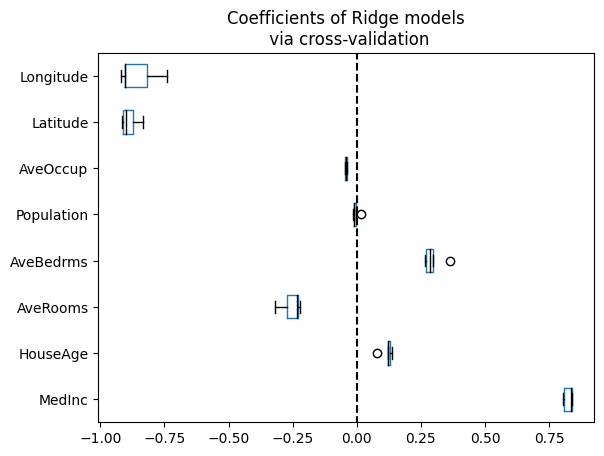

In [46]:
color = {"whiskers": "black", "medians": "black", "caps": "black"}
coefs.plot.box(vert=False, color=color)
plt.axvline(x=0, ymin=-1, ymax=1, color="black", linestyle="--")
_ = plt.title("Coefficients of Ridge models\n via cross-validation")

In [47]:
## PART 2 Exploratory Data Analysis and preprocessing
import os
from sklearn.datasets import fetch_california_housing

 # This dataset consists of 20,640 samples and 9 features.

X, y = fetch_california_housing(return_X_y=True, as_frame=True)



In [48]:
# View first 5 data row (features) in X
X.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


In [49]:
# View first 5 data result values in y for variable MedHouseVal ... Median House Value
y.head(5)

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [53]:
california_housing.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [75]:
# Information about the dataset
california_housing.data.info()
california_housing.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float6

In [55]:
# Statistical summary of the dataset
california_housing.data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000


## Explore the dataset by visualization
Usually in this step I can find the characteristics of dataset through various visualization techniques. I drew a correlation matrix heat map to depict the different degrees of correlation among the variables. As to price, high positively correlated features include sqft_living, grade, sqft_above, and sqft_living15. There are two negatively correlated features id and zipcode, and they have a very low correlation with price as well.

<Axes: >

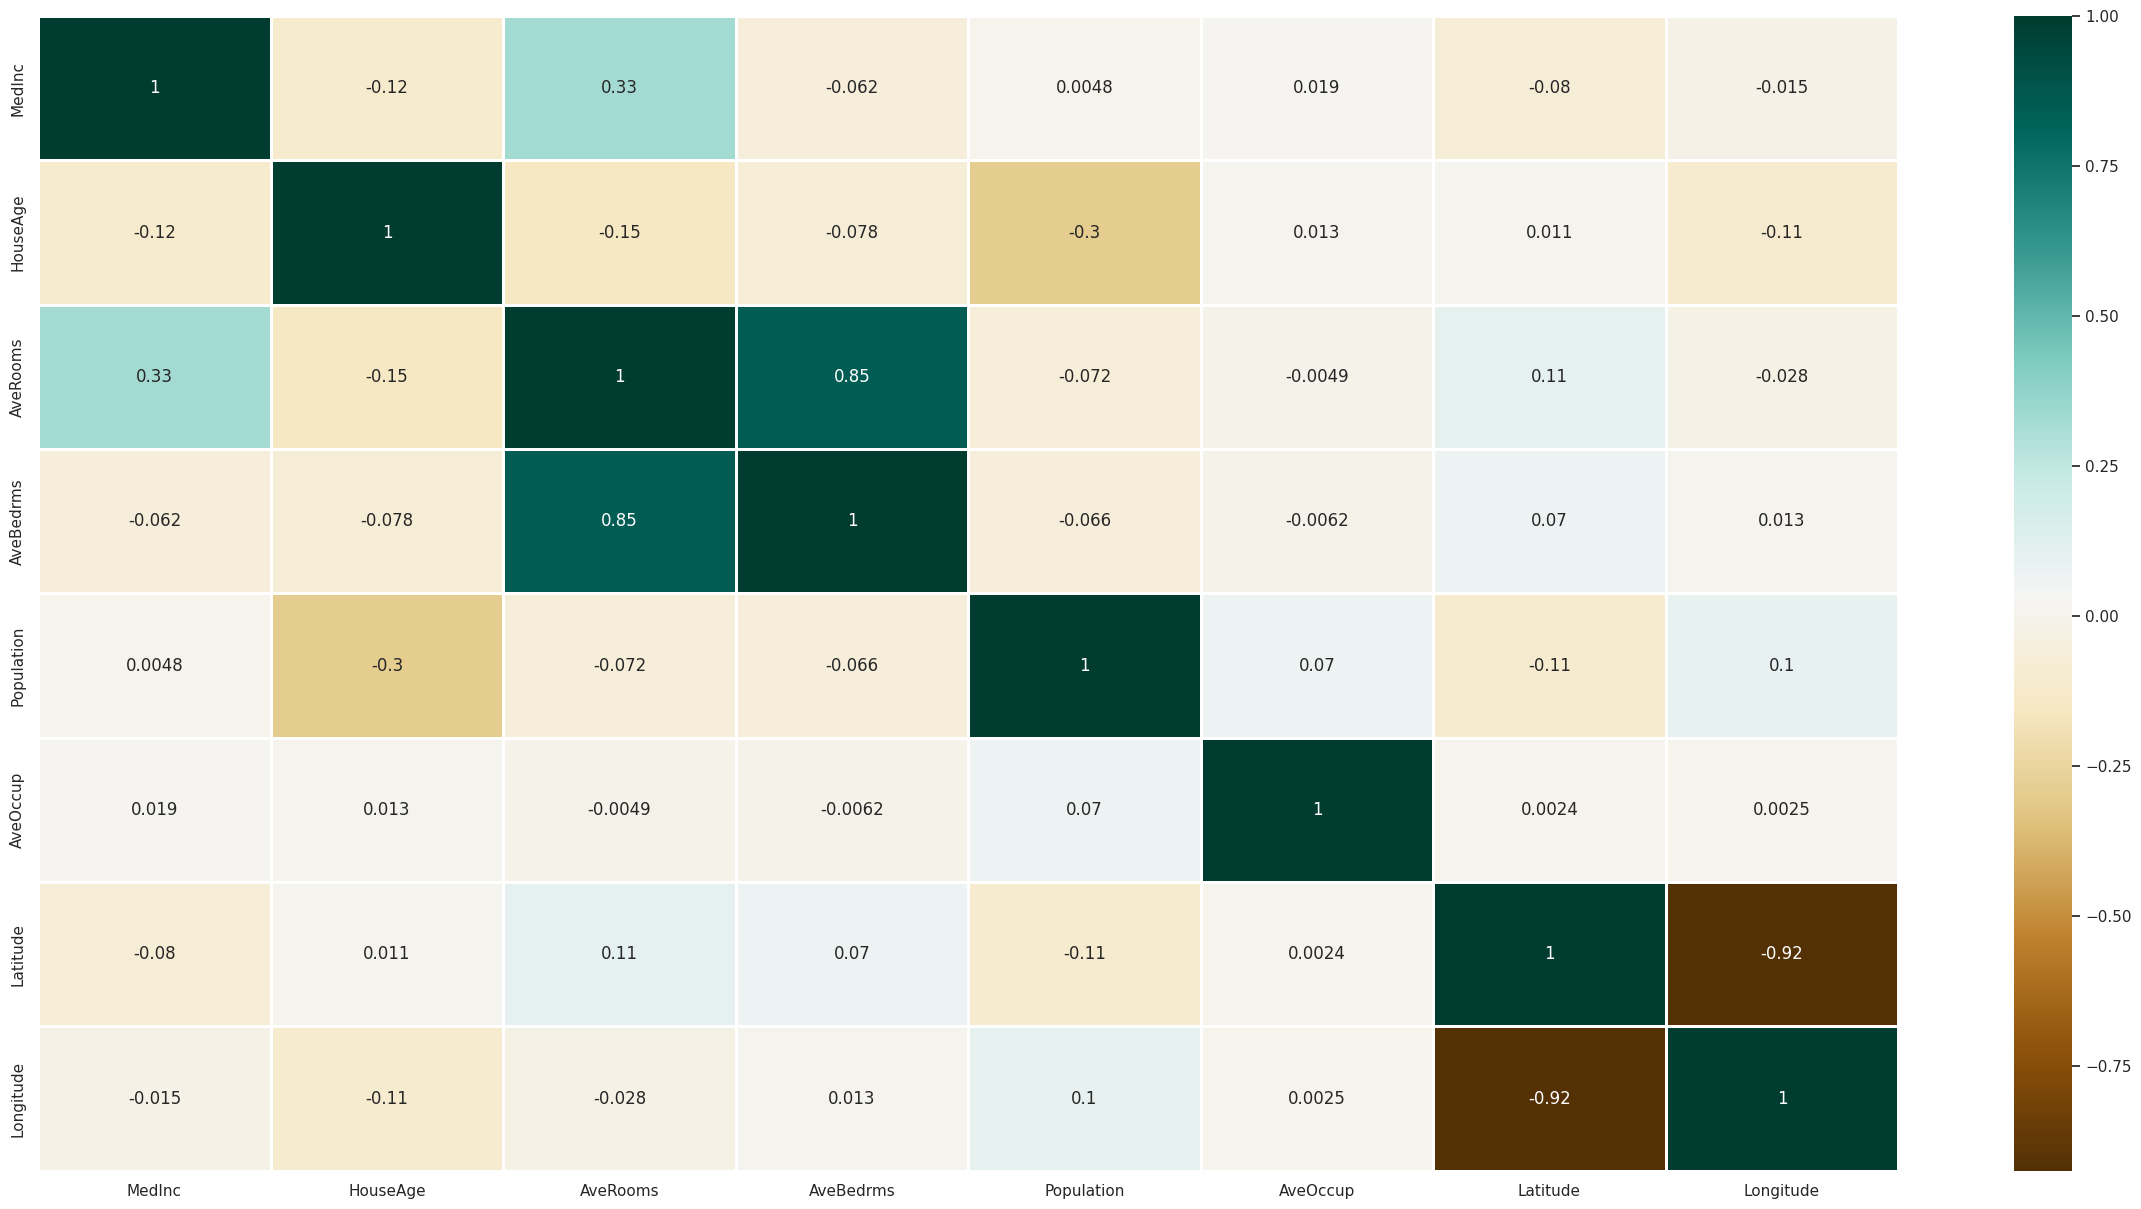

In [80]:
import plotly
import plotly.graph_objs as go
import plotly.offline as ply
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from plotly import tools
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style= "whitegrid")

corr_mat = california_housing.data.corr()
plt.figure(figsize=(30,15))
sns.heatmap(corr_mat, cmap = 'BrBG', linecolor = 'white', linewidth = 1, annot=True)

With distribution plot of price, I can see that most of the prices are under 1 million with few outliers, some even close to 8 million.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


<ipython-input-74-8927c0354985>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='MedHouseVal', ylabel='Density'>

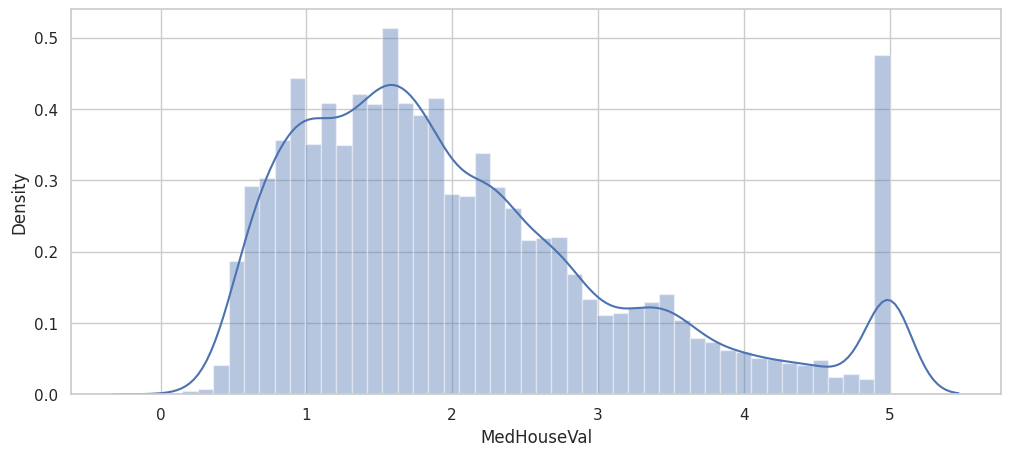

In [74]:
plt.figure(figsize=(12,5))
sns.distplot(california_housing.frame['MedHouseVal'])

In this subplot, y axis is price and x axis are sqft_living, bedrooms, bathrooms, grade, yr_built and lat. My first assumption for Linear Regression is that the features of the dataset have a linear relationship with those dependent variables.

In [96]:
!pip install plotly

In [134]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go


kc_data = california_housing.frame


fig1 = go.Scattergl(x=kc_data['MedInc'], y=kc_data['MedHouseVal'], mode = 'markers', name = 'MedInc')
fig2 = go.Scattergl(x=kc_data['AveRooms'], y=kc_data['MedHouseVal'], mode = 'markers', name = 'AveRooms')
fig3 = go.Scattergl(x=kc_data['AveBedrms'], y=kc_data['MedHouseVal'],mode = 'markers', name = 'AveBedrms')
fig4 = go.Scattergl(x=kc_data['AveOccup'], y=kc_data['MedHouseVal'],mode = 'markers', name = 'AveOccup')
fig5 = go.Scattergl(x=kc_data['Longitude'], y=kc_data['MedHouseVal'],mode = 'markers', name = 'Longitude')
fig6 = go.Scattergl(x=kc_data['Latitude'], y=kc_data['MedHouseVal'],mode = 'markers', name = 'Latitude')

fig = make_subplots(rows=3, cols=2, subplot_titles=('MedInc vs MedHouseVal', 'AveRooms vs MedHouseVal',
'AveBedrms vs MedHouseVal', 'AveOccup vs MedHouseVal',  'Longitude vs MedHouseVal', 'Latitude vs MedHouseVal'))

fig.append_trace(fig1, 1, 1)
fig.append_trace(fig2, 1, 2)
fig.append_trace(fig3, 2, 1)
fig.append_trace(fig4, 2, 2)
fig.append_trace(fig5, 3, 1)
fig.append_trace(fig6, 3, 2)


fig.update_layout(height=800, width=800, title_text="MedHouseVal Subplots")
fig.show(renderer="colab")

## Data Preprocessing
From output of kc_data.info() above, I can tell the dataset does not have null values. But as we can see from the visualization I need to remove some outliers with

In [135]:
kc_df = kc_data.drop(kc_data[kc_data["AveBedrms"]>10].index )
kc_df = kc_data.drop(kc_data[kc_data["AveRooms"]>10].index )
kc_df = kc_data.drop(kc_data[kc_data["AveOccup"]>6].index )

## Create y and X, split data for training and testing

In [183]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y = kc_df.MedHouseVal

features = ['AveBedrms', 'AveRooms', 'AveOccup', 'Longitude', 'Latitude']
X = kc_df[features]
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)



## Linear Regression

In [184]:
from sklearn.linear_model import LinearRegression

kc_lrmodel = LinearRegression()
kc_lrmodel.fit(X_train, y_train)
# Predicting the Test set results

kc_lrmodel.score(X_test, y_test)

y_lrpred = kc_lrmodel.predict(X_test)

print("X_test", X_test)
print("y_lrpred",y_lrpred)

mean_squared_error(y_lrpred, y_test)

X_test [[ 0.42361216  1.20280332 -0.58555054 -1.00204356  1.05275066]
 [ 0.39719946  0.3415481   0.28796882  0.00882477  0.20657713]
 [-0.06664667  0.63288678  0.29902333  0.77071075 -0.71439627]
 ...
 [-0.00638295 -0.52789991 -1.24073538 -1.43029319  0.99665076]
 [-0.58220706 -0.1713897  -0.61645365 -0.69330545  0.94990084]
 [-0.16502087  0.34882103 -0.29166568  0.83544616 -0.74244622]]
y_lrpred [2.80325486 1.64986037 2.62682152 ... 2.48033231 2.01583741 2.59113923]


0.7103521793873181

## SVR

In [188]:
from sklearn.svm import SVR

kc_svrmodel = SVR(kernel='rbf')
kc_svrmodel.fit(X_train, y_train)
y_svrpred = kc_svrmodel.predict(X_test)

## K Nearest Neighbor Regression

In [189]:
from sklearn.neighbors import KNeighborsRegressor

kc_knnmodel = KNeighborsRegressor(n_neighbors=1)
kc_knnmodel.fit(X_train,y_train)
y_knnpred = kc_knnmodel.predict(X_test)


mean_squared_error(y_knnpred, y_test)

0.6002597416709206

## Random Forest

In [190]:
from sklearn.ensemble import RandomForestRegressor

kc_rfmodel = RandomForestRegressor(n_estimators=20, random_state = 0)
kc_rfmodel.fit(X_train, y_train)
y_rfpred = kc_rfmodel.predict(X_test)


mean_squared_error(y_rfpred, y_test)

0.24236437451643453

## XGBoost

In [191]:
from xgboost import XGBRegressor

kc_xgbmodel = XGBRegressor()
kc_xgbmodel.fit(X_train, y_train)
y_xgbpred = kc_xgbmodel.predict(X_test)

mean_squared_error(y_xgbpred, y_test)

0.2183900927671501

## Measuring the models

In [192]:
# Calculate Adjusted R Squared Value
from sklearn import metrics
lr_R = metrics.r2_score(y_test,y_lrpred)
lr_a_R = 1 - (1-lr_R)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Adjusted R Squared Value for Linear Regression: ', round(lr_a_R, 3) )

svr_R = metrics.r2_score(y_test,y_svrpred)
svr_a_R = 1 - (1-svr_R)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Adjusted R Squared Value for SVR: ', round(svr_a_R, 3) )

rf_R = metrics.r2_score(y_test,y_rfpred)
rf_a_R = 1 - (1-rf_R)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Adjusted R Squared Value for Random Forest: ', round(rf_a_R, 3) )

knn_R = metrics.r2_score(y_test,y_knnpred)
knn_a_R = 1 - (1-knn_R)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Adjusted R Squared Value for KNN: ', round(knn_a_R, 3) )

xgb_R = metrics.r2_score(y_test,y_xgbpred)
xgb_a_R = 1 - (1-xgb_R)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Adjusted R Squared Value for XGBoost: ', round(xgb_a_R, 3) )


Adjusted R Squared Value for Linear Regression:  0.476
Adjusted R Squared Value for SVR:  0.679
Adjusted R Squared Value for Random Forest:  0.821
Adjusted R Squared Value for KNN:  0.557
Adjusted R Squared Value for XGBoost:  0.839


XGBoost got the best score! second place was Random Forest.

### A real sample prediction
2015 I bought a house in Redmond, can't wait to try my models! Guess which model will win?

In [193]:
columns = ['AveBedrms', 'AveRooms', 'AveOccup', 'Longitude', 'Latitude']
sample = pd.DataFrame([[3, 3, 2, -122.23, 3.8]],
                        columns = columns )

customer = sc_X.transform(sample)

lrpredictor = kc_lrmodel.predict(customer)
print('Prediction by Linear Regression is', lrpredictor)

svrpredictor = kc_svrmodel.predict(customer)
print('Prediction by SVR is',svrpredictor)

rfpredictor = kc_rfmodel.predict(customer)
print('Prediction by Random Forest is', rfpredictor)

knnpredictor = kc_knnmodel.predict(customer)
print('Prediction by KNN is',knnpredictor)

xgbpredictor = kc_xgbmodel.predict(customer)
print('Prediction by XGBoost is',xgbpredictor)


Prediction by Linear Regression is [24.80532514]
Prediction by SVR is [2.02058316]
Prediction by Random Forest is [3.9217025]
Prediction by KNN is [1.938]
Prediction by XGBoost is [6.1668487]


From this real world case we can see the Random Forest, KNN and SVR all provide similar values of 1.9 to 3.9 , with linear regression model and XGBoost appear to vary alot and warrent further consideration.

In [128]:
california_housing.target.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [173]:
features_of_interest = ['AveBedrms', 'AveRooms', 'AveOccup', 'Longitude', 'Latitude', 'MedHouseVal']
california_housing.frame[features_of_interest].describe()

,AveBedrms,AveRooms,AveOccup,Longitude,Latitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,1.096675,5.429000,3.070655,-119.569704,35.631861,2.068558
std,0.473911,2.474173,10.386050,2.003532,2.135952,1.153956
min,0.333333,0.846154,0.692308,-124.350000,32.540000,0.149990
25%,1.006079,4.440716,2.429741,-121.800000,33.930000,1.196000
50%,1.048780,5.229129,2.818116,-118.490000,34.260000,1.797000
75%,1.099526,6.052381,3.282261,-118.010000,37.710000,2.647250
max,34.066667,141.909091,1243.333333,-114.310000,41.950000,5.000010
